In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [62]:
print(df["smoking_history"].unique())

['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [3]:
row1 = df.iloc[0]
row1

gender                 Female
age                      80.0
hypertension                0
heart_disease               1
smoking_history         never
bmi                     25.19
HbA1c_level               6.6
blood_glucose_level       140
diabetes                    0
Name: 0, dtype: object

In [5]:
df.head(7)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
df.shape

(100000, 9)

In [10]:
df.duplicated().sum()

3854

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(96146, 9)

In [13]:
df.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [14]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

<Axes: >

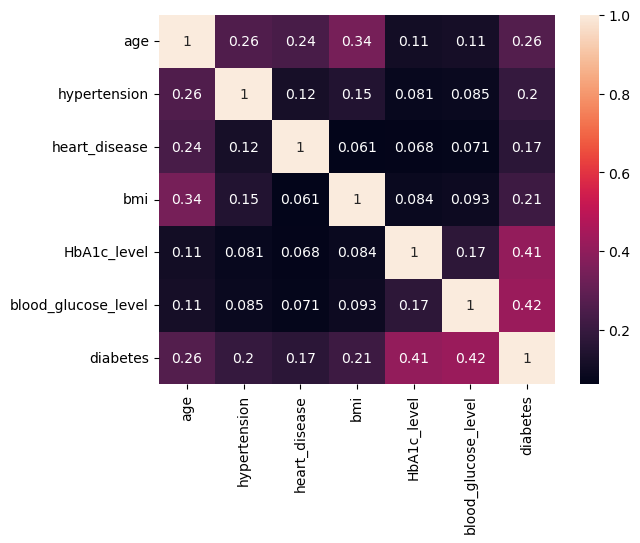

In [15]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

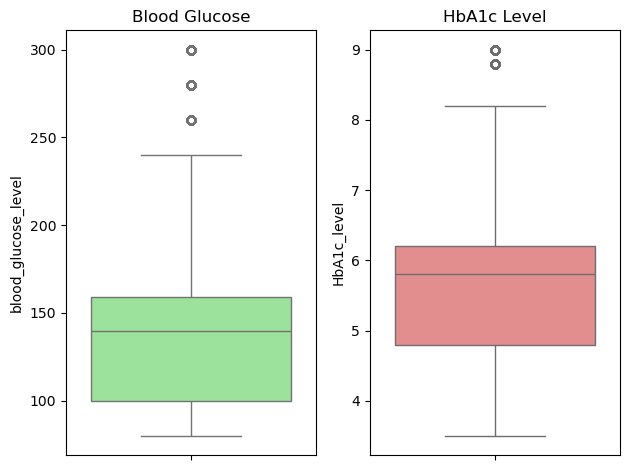

In [17]:
# 1️⃣ Blood Glucose boxplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.boxplot(y=df['blood_glucose_level'], color='lightgreen')
plt.title('Blood Glucose')

# 2️⃣ HbA1c Level boxplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
sns.boxplot(y=df['HbA1c_level'], color='lightcoral')
plt.title('HbA1c Level')

plt.tight_layout()
plt.show()

In [18]:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']
df_cat = df[cat_cols]

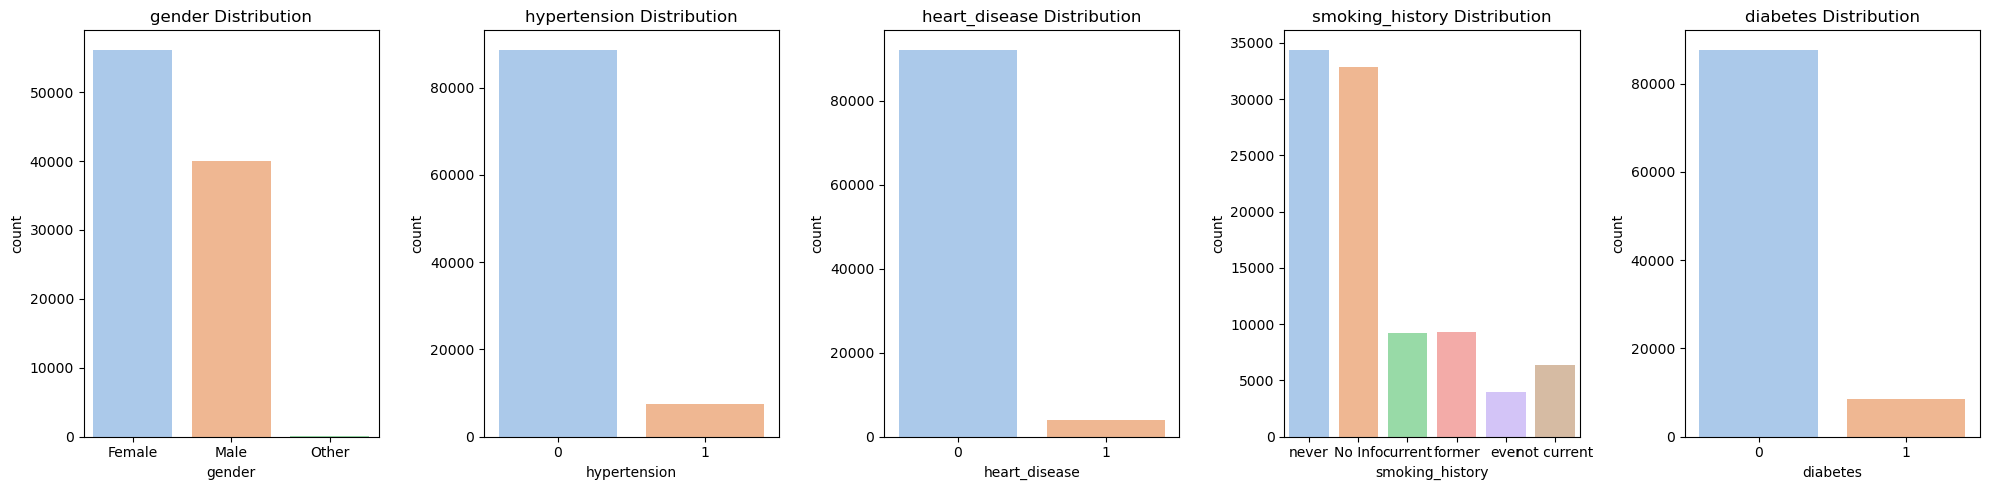

In [19]:
plt.figure(figsize=(20,5))

for i, col in enumerate(cat_cols):
    plt.subplot(1, len(cat_cols), i+1)
    sns.countplot(x=col, data=df[cat_cols], palette='pastel')
    plt.title(col + " Distribution")

plt.tight_layout()
plt.show()

In [20]:
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level',]

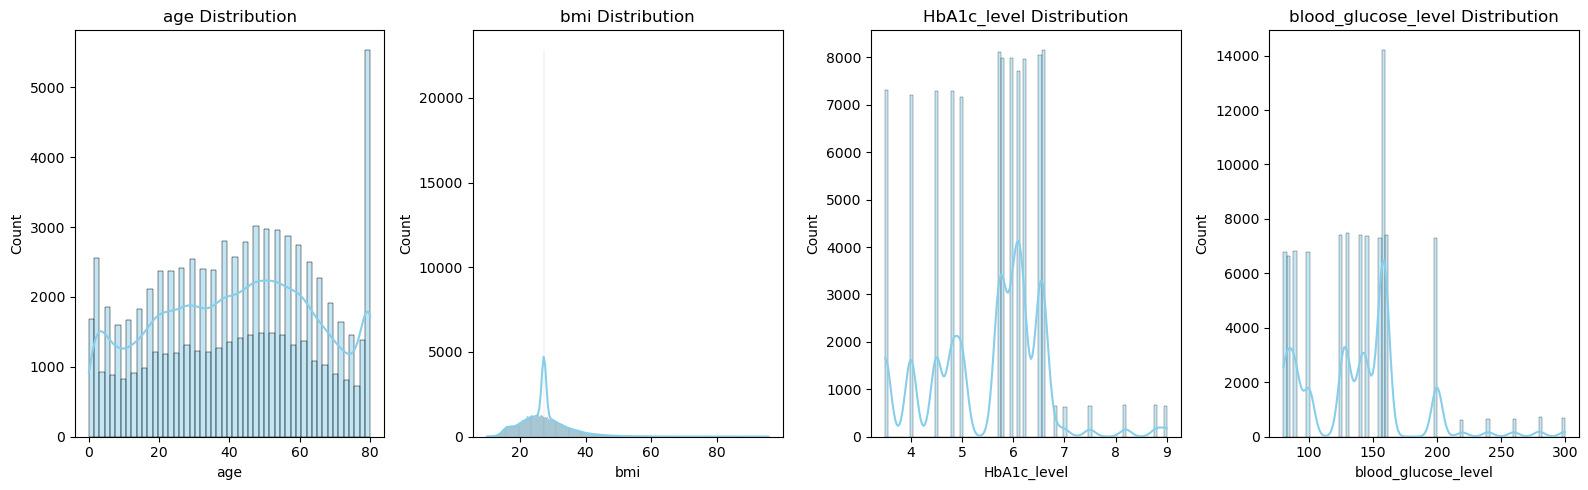

In [21]:
plt.figure(figsize=(16,5))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(col + " Distribution")
plt.tight_layout()
plt.show()


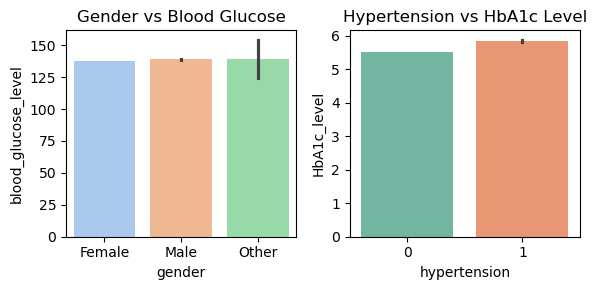

In [22]:
plt.figure(figsize=(6,3))
# 1️⃣ Gender vs Blood Glucose
plt.subplot(1, 2, 1)
sns.barplot(x='gender', y='blood_glucose_level', data=df, palette='pastel')
plt.title('Gender vs Blood Glucose')
# 2️⃣ Hypertension vs HbA1c Level
plt.subplot(1, 2, 2)
sns.barplot(x='hypertension', y='HbA1c_level', data=df, palette='Set2')
plt.title('Hypertension vs HbA1c Level')
plt.tight_layout()
plt.show()

In [23]:
# sns.pairplot(df[num_cols + ['diabetes']], hue='diabetes')

<Axes: xlabel='diabetes', ylabel='bmi'>

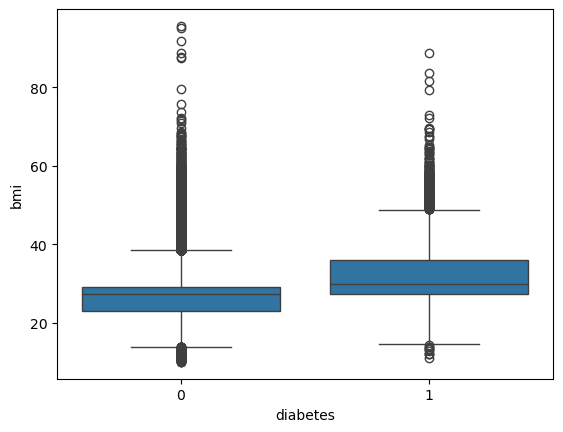

In [24]:
sns.boxplot(x='diabetes', y='bmi', data=df)

In [25]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [26]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [27]:
df_encoded = pd.get_dummies(df,drop_first=True)

In [28]:
df_encoded

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,False,False,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,False,False,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,True,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,False,False,False,False,False,True,False


In [29]:
df_encoded = df_encoded.astype(int)

In [30]:
df_encoded

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25,6,140,0,0,0,0,0,0,1,0
1,54,0,0,27,6,80,0,0,0,0,0,0,0,0
2,28,0,0,27,5,158,0,1,0,0,0,0,1,0
3,36,0,0,23,5,155,0,0,0,1,0,0,0,0
4,76,1,1,20,4,155,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36,0,0,24,4,145,0,0,0,0,0,0,0,0
99996,2,0,0,17,6,100,0,0,0,0,0,0,0,0
99997,66,0,0,27,5,155,0,1,0,0,0,1,0,0
99998,24,0,0,35,4,100,0,0,0,0,0,0,1,0


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix

In [44]:
X  = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [52]:
modelS = {
    "Logistic Regression" : LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Byeas" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    "SVM" : SVC(),
    "Random Forest" : RandomForestClassifier(n_estimators=100, random_state=42)
}

In [53]:
result = []

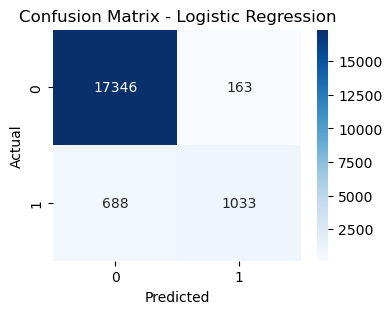

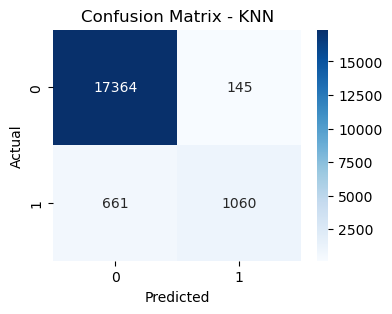

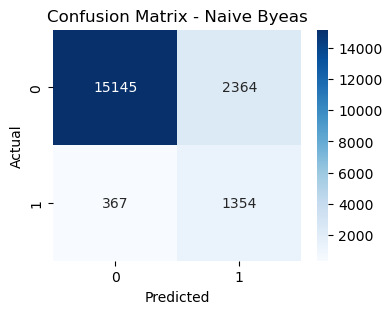

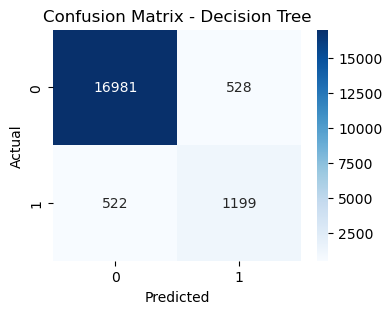

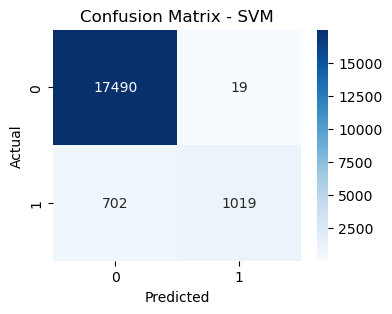

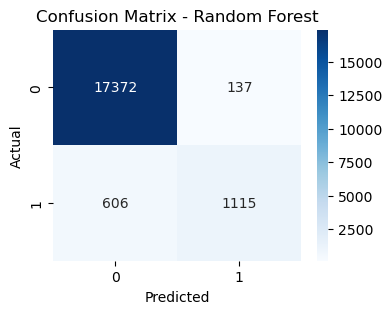

In [55]:
for name, model in modelS.items():
    if name in ["Logistic Regression", "KNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    result.append({
        'model' : name,
        'Accuracy' : round(acc,4),
        'f1 score' : round(f1,4)
    })
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [57]:
result

[{'model': 'Logistic Regression', 'Accuracy': 0.9557, 'f1 score': 0.7083},
 {'model': 'KNN', 'Accuracy': 0.9581, 'f1 score': 0.7245},
 {'model': 'Naive Byeas', 'Accuracy': 0.858, 'f1 score': 0.4979},
 {'model': 'Decision Tree', 'Accuracy': 0.9454, 'f1 score': 0.6955},
 {'model': 'SVM', 'Accuracy': 0.9625, 'f1 score': 0.7387},
 {'model': 'Random Forest', 'Accuracy': 0.9614, 'f1 score': 0.7501}]

In [58]:
import joblib
joblib.dump(modelS['Random Forest'],'Random.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']

In [ ]:
#import joblib

#encoders = {}
#for col in ['gender', 'hypertension', 'heart_disease', 'smoking_history']:
 #   le = LabelEncoder()
  #  df[col] = le.fit_transform(df[col])
   # encoders[col] = le


In [90]:
# Save encoders
#joblib.dump(encoders, 'encoders.joblib')

['encoders.joblib']

In [92]:
#scaler = StandardScaler()
#num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
#df[num_cols] = scaler.fit_transform(df[num_cols])


In [94]:
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#import joblib

In [96]:
# Split
#X = df.drop('diabetes', axis=1)
#y = df['diabetes']

In [98]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
#model = RandomForestClassifier(n_estimators=100, random_state=42)
#model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [102]:
# Predictions
#y_pred = model.predict(X_test)

In [104]:
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.968538741549662

Confusion Matrix:
 [[17437    72]
 [  533  1188]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.94      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [106]:
# Save model
#joblib.dump(model, 'model.joblib')

['model.joblib']

In [108]:
#joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [110]:
#obj_cols = df.select_dtypes(include='object').columns
#print("Object type columns:", obj_cols)

# Har column ke unique values
#for col in obj_cols:
 #   print(f"\nColumn: {col}")
  #  print(df[col].unique())

Object type columns: Index([], dtype='object')


In [112]:
#for col in df.columns:
 #   print(f"\nColumn: {col}")
  #  print(df[col].unique())


Column: gender
[0 1 2]

Column: age
[ 1.7008397   0.54337205 -0.61409561 -0.25795171  1.52276775 -0.9702395
  0.09819218  1.65632171  0.00915621 -0.43602366  0.49885406  1.61180372
  1.12210587 -1.19282943 -0.21343373 -0.07987977 -1.6380093   1.21114184
  1.3446958  -1.68252729 -0.52505963  0.14271017  0.05367419  0.3653001
 -0.03536178 -0.70313158 -0.34698769  1.38921379  1.56728574  1.07758788
 -0.56957762  0.81047996 -0.16891574 -1.72704527  0.676926    1.43373178
 -1.01475749  0.18722815 -0.92572151  0.76596198 -0.65861359 -1.28186541
  0.63240802 -1.77156326 -1.54897333 -1.37090138 -1.59349131  0.58789003
 -1.45993735  0.89951594  0.23174614 -1.32638339  1.16662386  1.47824976
 -0.88120353  0.72144399 -1.05927547 -0.79216755 -1.10379346 -0.74764957
 -1.8570378  -0.39150567 -1.14831145  0.85499795 -0.48054165 -1.50445534
  0.32078211 -0.12439775  1.0330699  -1.23734742  1.25565983 -1.83566916
  0.27626413  0.40981809  1.30017782 -1.82142341  0.98855191  0.94403392
  0.45433607 -1.